In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

plt.rcParams["axes.spines.top"] = False  
plt.rcParams["axes.spines.right"] = False

warnings.filterwarnings("ignore")

We import the insurance data with name `ins`

In [255]:
ins = pd.read_csv('insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We first check the completeness of our data, in case some cleaning is needed

In [256]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

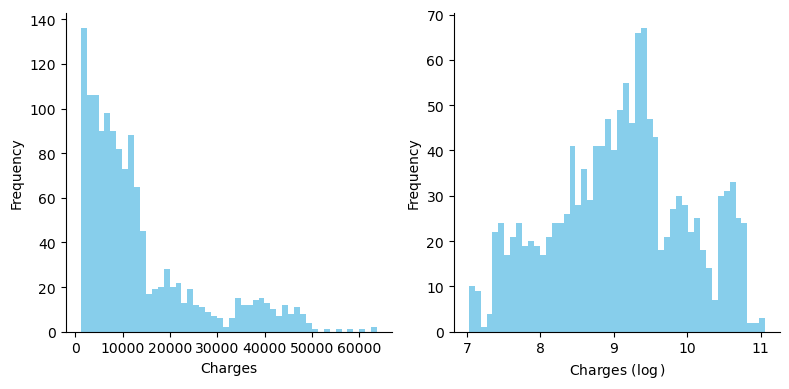

In [257]:
figure, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].hist(ins["charges"], bins=50, color="skyblue")
ax[0].set_xlabel("Charges")
ax[0].set_ylabel("Frequency")

ax[1].hist(np.log(ins["charges"]), bins=50, color="skyblue")
ax[1].set_xlabel("Charges ($\log$)")
ax[1].set_ylabel("Frequency")

plt.tight_layout()

We first give a general visualization on whole dataset and calculate their correlations.

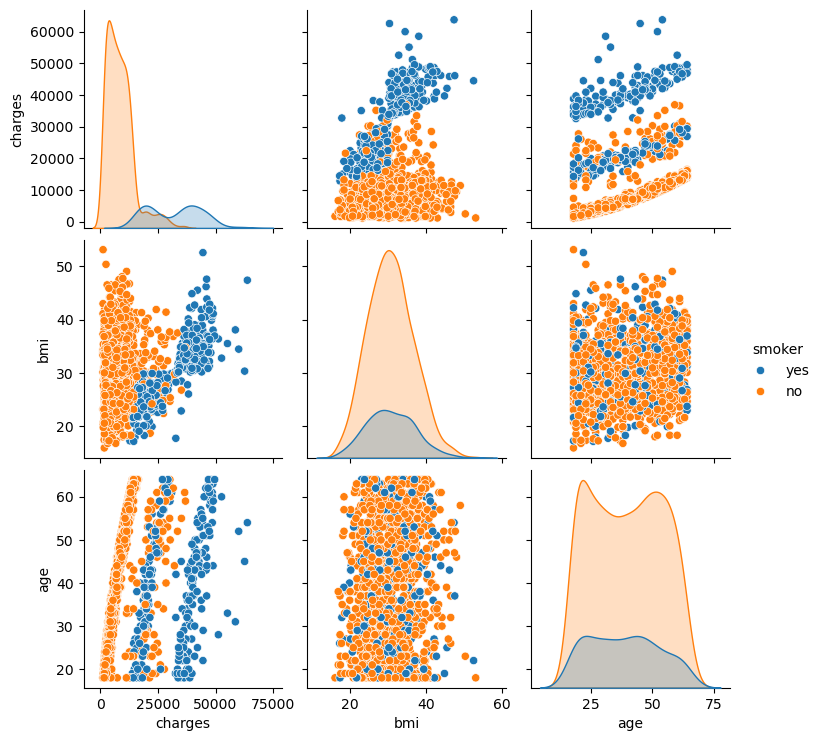

In [258]:
sns.pairplot(ins[["charges","bmi","age","smoker"]],hue="smoker",diag_kind="kde",diag_kws=dict(color="skyblue"),plot_kws=dict(color="orange"))

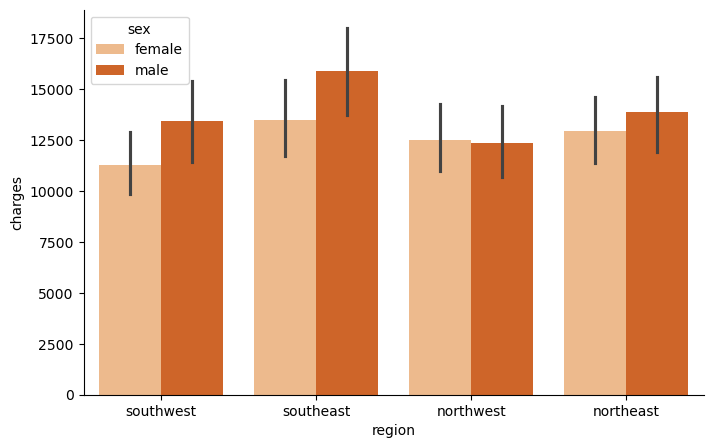

In [259]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax = sns.barplot(x="region", y="charges", hue="sex", data=ins, palette="Oranges")

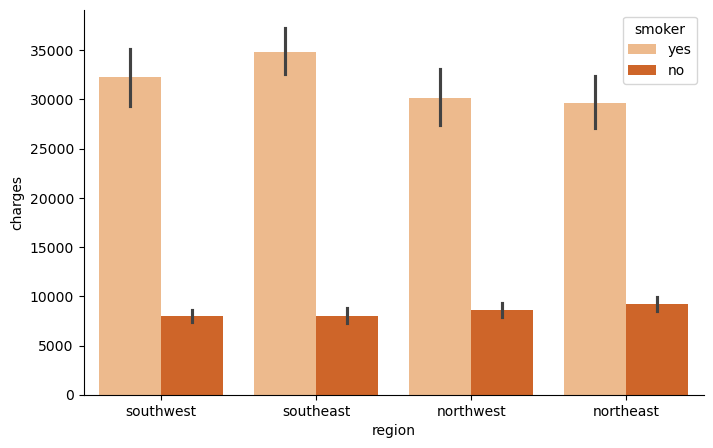

In [260]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax = sns.barplot(x="region", y="charges", hue="smoker", data=ins, palette="Oranges")

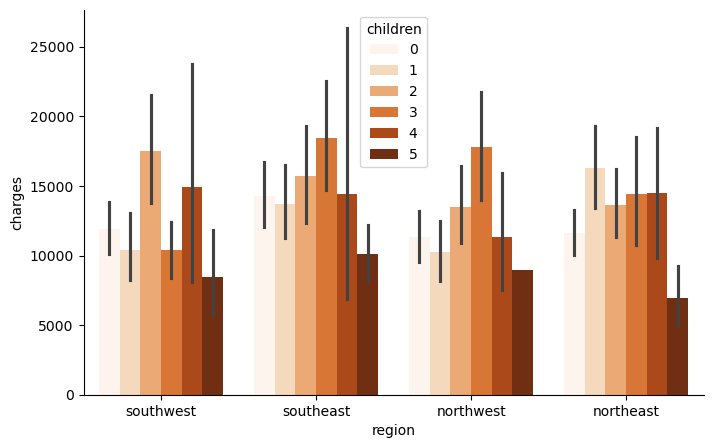

In [261]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax = sns.barplot(x="region", y="charges", hue="children", data=ins, palette="Oranges")

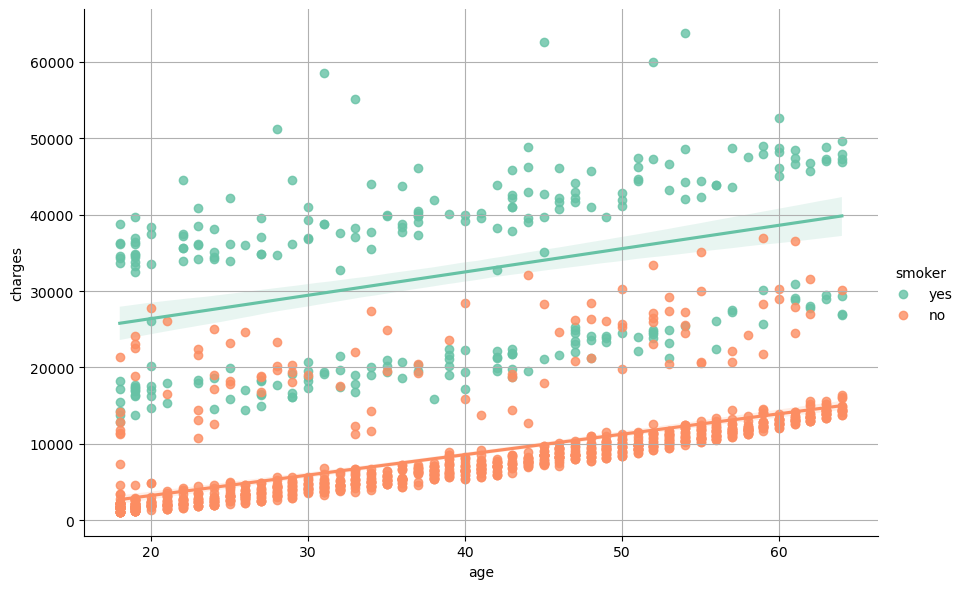

In [262]:
sns.lmplot(x="age", y="charges", data=ins, hue="smoker", palette="Set2", height=6, aspect=1.5, legend=True)
plt.grid(True)

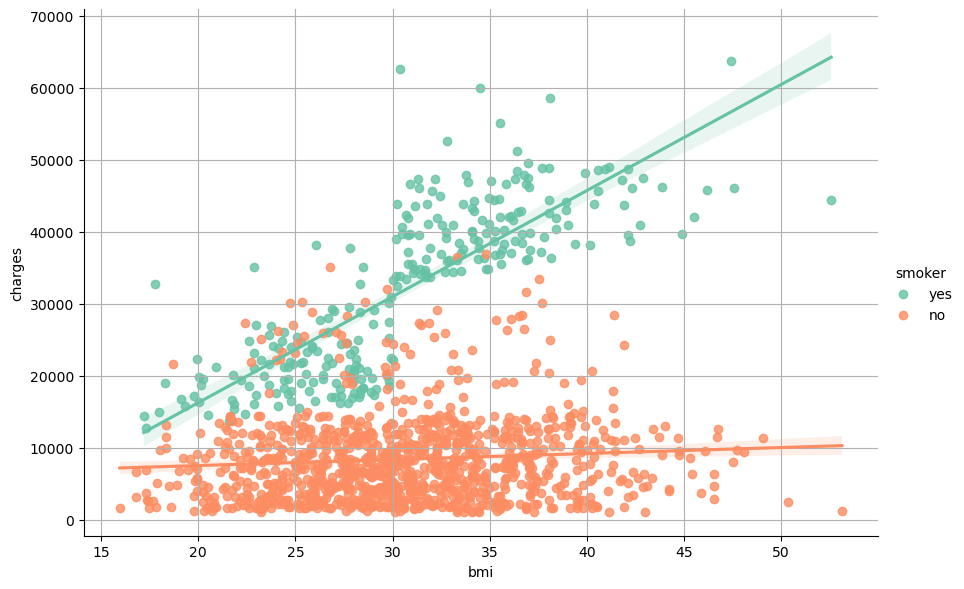

In [263]:
sns.lmplot(x="bmi", y="charges", data=ins, hue="smoker", palette="Set2", height=6, aspect=1.5, legend=True)
plt.grid(True)

In [264]:
ins["region"] = ins["region"].map({"southwest":1, "southeast":2, "northwest":3, "northeast":4})
ins["sex"] = ins["sex"].map({"female":0,"male":1})
ins["smoker"] = ins["smoker"].map({"no":0,"yes":1})

<Axes: >

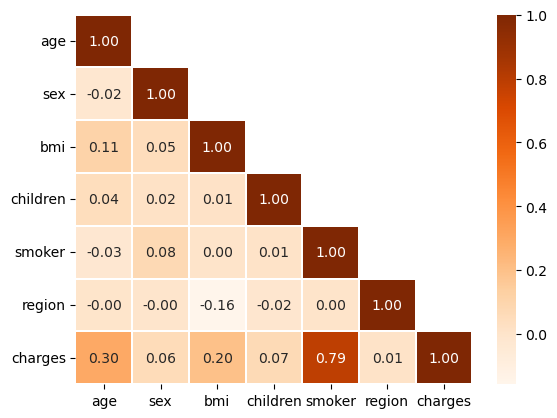

In [265]:
corr = ins.corr()

mask = np.ones(corr.shape, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1):
        mask[i, j] = 0

sns.heatmap(corr, mask=mask, annot=True,linewidths=0.1,linecolor= "white", fmt=".2f", cmap="Oranges")

In [266]:
X = ins.drop(columns=["charges"])
Y =ins["charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

LR = LinearRegression()
LR.fit(X_train, Y_train)

Y_pred = LR.predict(X_test)

print(LR.intercept_, LR.coef_,LR.score(X_test,Y_test))

-12816.01819899928 [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381   288.50857254] 0.7998747145449959


<Figure size 800x500 with 0 Axes>

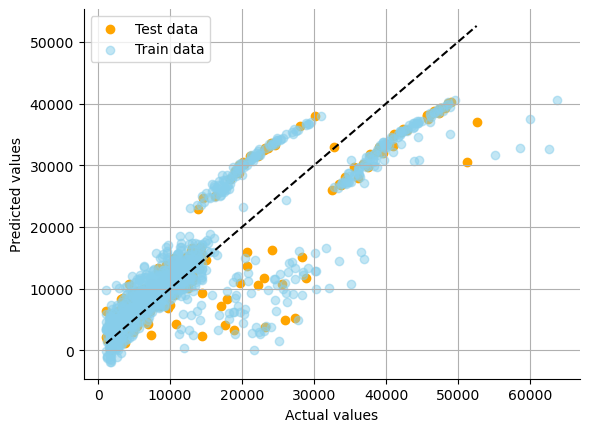

<Figure size 800x500 with 0 Axes>

In [272]:
plt.scatter(Y_test, Y_pred, color="orange",label="Test data")
plt.scatter(Y_train, LR.predict(X_train), color="skyblue",alpha=0.5,label="Train data")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle="--",color="black")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.grid(True)
plt.legend()
plt.figure(figsize=(8,5))

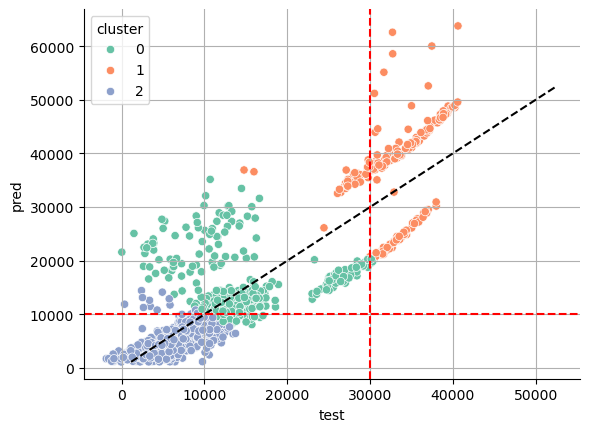

In [269]:
clusters = pd.DataFrame({"test":LR.predict(X), "pred":Y})
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(clusters)
clusters["cluster"] = kmeans.labels_

sns.scatterplot(x="test", y="pred", data=clusters, hue="cluster", palette="Set2")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle="--",color="black")
plt.axhline(y=10000, color='red', linestyle='--')
plt.axvline(x=30000, color='red', linestyle='--')
plt.grid(True)

In [270]:
clusters = pd.concat([ins, pd.Series(kmeans.labels_)], axis=1)
clusters

,age,sex,bmi,children,smoker,region,charges,0
0,19,0,27.900,0,1,1,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,2
2,28,1,33.000,3,0,2,4449.46200,2
3,33,1,22.705,0,0,3,21984.47061,0
4,32,1,28.880,0,0,3,3866.85520,2
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830,0
1334,18,0,31.920,0,0,4,2205.98080,2
1335,18,0,36.850,0,0,2,1629.83350,2
1336,21,0,25.800,0,0,1,2007.94500,2


In [ ]:
# calculate the mean of each cluster
clusters.groupby(0).mean()

,age,sex,bmi,children,smoker,region,charges
0,,,,,,,
0,48.880631,0.470721,31.206532,1.085586,0.150901,2.569820,14835.095481
1,42.071770,0.602871,32.688014,1.162679,0.990431,2.449761,36720.235419
2,32.062774,0.497810,29.693620,1.080292,0.000000,2.439416,5101.479408
